#Environment Setup
This will take sometime.

In [1]:
%%capture
#Download anaconda
!wget -c https://repo.continuum.io/archive/Anaconda3-5.2.0-Linux-x86_64.sh

#Install anaconda
!chmod +x Anaconda3-5.2.0-Linux-x86_64.sh
!bash ./Anaconda3-5.2.0-Linux-x86_64.sh -b -f -p /usr/local

#Install pytorch
!conda install -q -y --prefix /usr/local -c pytorch faiss-cpu

#Import libraries
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
import faiss
import os
import matplotlib.pyplot as plt

#Uninstall the current version of CUDA
!sudo apt-get --purge -y remove 'cuda*'
!sudo apt-get --purge -y remove 'nvidia*'

#Install cuda 9.1
!wget https://developer.nvidia.com/compute/cuda/9.1/Prod/local_installers/cuda-repo-ubuntu1704-9-1-local_9.1.85-1_amd64
!sudo dpkg -i cuda-repo-ubuntu1704-9-1-local_9.1.85-1_amd64
!sudo apt-key add /var/cuda-repo-9-1-local/7fa2af80.pub
!sudo apt-get update
!sudo apt-get install -y cuda-9-1

#Clone to the paper repository
!git clone https://github.com/fperazzi/proSR.git

#Move to the directory
%cd /content/proSR

#Install Dependencies

#Create virtual environment
!conda create -y -n proSR

#Install torch
!conda install -y pytorch=0.4.0 torchvision cuda91 -c pytorch

#Install image libraries
!conda install -y scikit-image cython

#Install visdom
!conda install -y -c conda-forge visdom

#Install pip and easydict
!pip install easydict

#Add Path
%set_env PYTHONPATH=/content/proSR/lib

#Activate the environment
!source activate proSR
!pip install easydict

#Get pre-trained models
!wget -nc https://www.dropbox.com/s/ulkvm4yt5v3vxd8/proSRGAN.zip -O proSRGAN.zip
!unzip -j proSRGAN.zip -d data/checkpoints
!rm proSRGAN.zip

#Make output direcotry
!mkdir outputs

#Upload Image

In [2]:
#Upload image file
from google.colab import files
uploaded = files.upload()

Saving sample.jpg to sample.jpg


#Perform Inference

In [4]:
#Running the model
!python test.py -i sample.jpg --checkpoint data/checkpoints/proSRGAN_x8.pth --scale 4 -o outputs

2023-02-21 10:48:28: phase: phase.TEST
2023-02-21 10:48:28: checkpoint: proSRGAN_x8.pth
{'D': {'act_params': {'negative_slope': 0.2},
       'act_type': 'LRELU',
       'input_residual': True,
       'ndf': 64,
       'scale_overhead': True,
       'update_freq': 2,
       'use_lsgan': True,
       'warmup_epochs': 0,
       'which_epoch': 'latest',
       'which_model_netD': 'srgan'},
 'G': {'bn_size': 4,
       'growth_rate': 40,
       'level_compression': -1,
       'level_config': [[8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8], [8]],
       'max_num_feature': 312,
       'max_scale': 8,
       'num_init_features': 160,
       'ps_woReLU': False,
       'res_factor': 0.2,
       'residual_denseblock': True,
       'vgg': [2, 4],
       'vgg_mean_pool': True},
 'data': {'input_size': [48, 36, 24], 'scale': [2, 4, 8]},
 'test': {'dataset': {'downscale': False,
                      'path': {'source': '', 'target': 'data/datasets/Set14'},
                      'stddev': [0.0039215, 0.0039215

#Display Original and Enhanced Image

Text(0.5, 1.0, '4X-Enhanced Image')

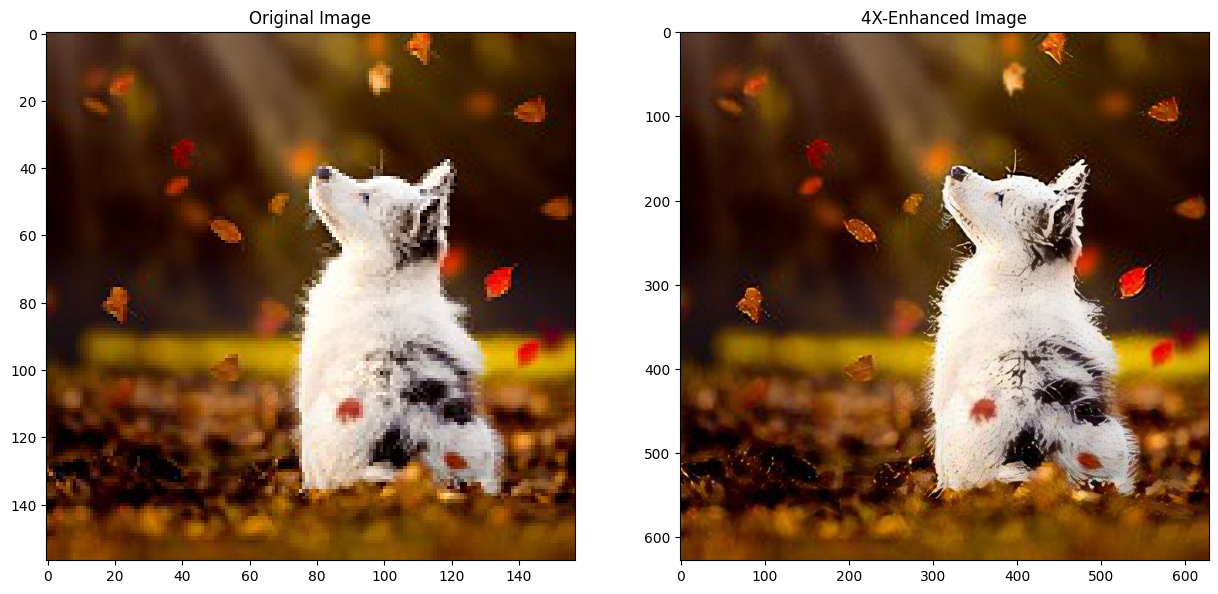

In [18]:
plt.figure(figsize=(15,12),dpi=100)
plt.subplot(1,2,1)
#Display original image
img_org = plt.imread('sample.jpg')
plt.imshow(img_org)
plt.title("Original Image")
plt.subplot(1,2,2)
#Display enhanced image
img_enh = plt.imread('outputs/sample.jpg')
plt.imshow(img_enh)
plt.title("4X-Enhanced Image")

In [ ]:
#Downloading enhanced image
files.download('outputs/sample.jpg') 